In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 11.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=817e39df3a9ac7bf23afab01190b1125e7edbdf844f798dcadc928484951b339
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
data = yf.download(tickers='GC=F',interval='1h',period='1y')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(5774, 6)

In [ ]:
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
data = data.dropna(how='any',axis=0) 
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Text(0.5, 1.0, 'GOLD')

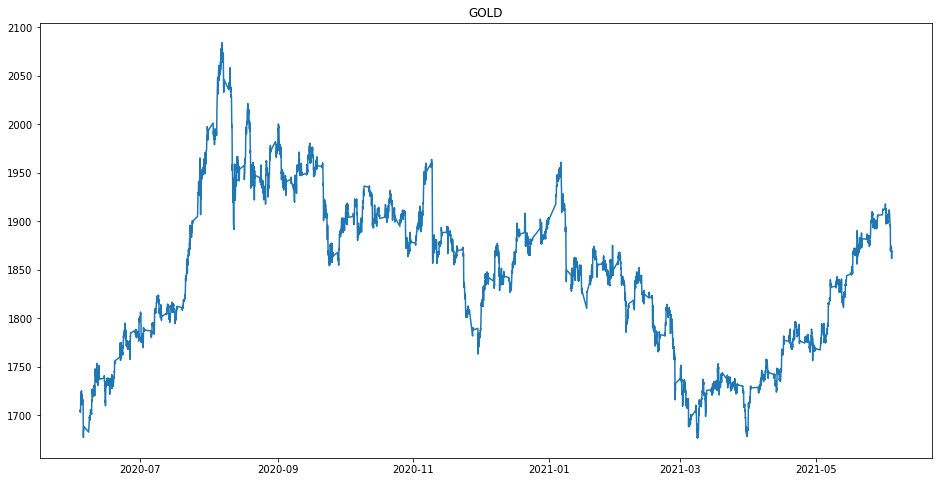

In [ ]:
#PLOTTING CLOSE PRICE W.R.T TIME
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.title("GOLD")


In [ ]:
!pip install attention

In [ ]:
def store_prev(val):
  prev = 



def my_rmse(y_true, y_pred):
    error = y_true - y_pred 
    sqr_error = K.square(error)
    mean_sqr_error = K.mean(sqr_error) 
    sqrt_mean_sqr_error = K.sqrt(mean_sqr_error) 
    return sqrt_mean_sqr_error

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Bidirectional
import keras
import tensorflow as tf
from attention import Attention

#creating dataframe
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Close'])
for i in range(0,len(data)):
    
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.index

#creating train and test sets
dataset = new_data.values

train = dataset[0:5000,:]
valid = dataset[5000:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()

#model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(Dropout(0.2))
#model.add(LSTM(units=50))
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(units=50)))
#model.add(Attention(50))
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1))))

model.add(Bidirectional(LSTM(units=50)))

model.add(Dense(1))

'''model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
 
])'''

model.compile(loss='mse', optimizer='adam',metrics=['mae'])
print(x_train.shape)
model.fit(x_train, y_train, epochs=7, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)






X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

(4940, 60, 1)
Epoch 1/7
4940/4940 - 60s - loss: 8.5331e-04 - mae: 0.0188
Epoch 2/7
4940/4940 - 54s - loss: 2.9100e-04 - mae: 0.0126
Epoch 3/7
4940/4940 - 53s - loss: 2.2120e-04 - mae: 0.0111
Epoch 4/7
4940/4940 - 53s - loss: 2.0715e-04 - mae: 0.0106
Epoch 5/7
4940/4940 - 53s - loss: 1.9372e-04 - mae: 0.0103
Epoch 6/7
4940/4940 - 53s - loss: 1.8352e-04 - mae: 0.0100
Epoch 7/7
4940/4940 - 53s - loss: 1.8451e-04 - mae: 0.0100
(774, 60)
(774, 60, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


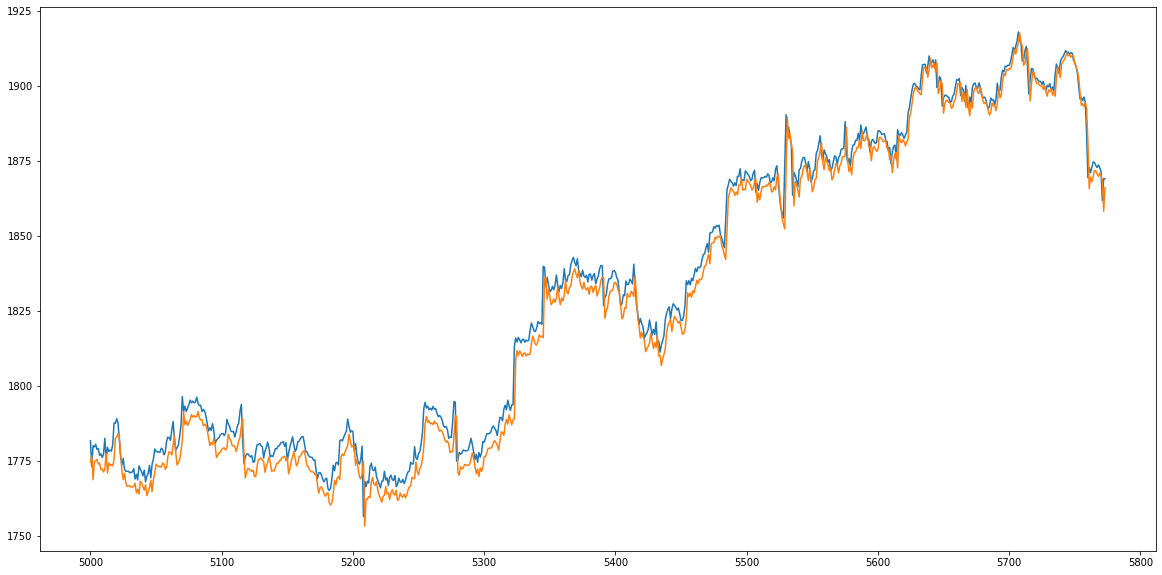

In [ ]:
train = new_data[:5000]
valid = new_data[5000:]
valid['Predictions'] = closing_price
#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
valid.to_csv('valid.csv')

In [ ]:
valid = pd.read_csv('/content/valid.csv')

In [ ]:
valid.head()

,Unnamed: 0,Close,Predictions
0,5000,1781.699951,1777.1040
1,5001,1773.099976,1779.3821
2,5002,1780.000000,1771.7817
3,5003,1779.599976,1777.9380
4,5004,1780.500000,1777.8057


In [ ]:
print(valid.corr())

             Unnamed: 0     Close  Predictions
Unnamed: 0     1.000000  0.939764     0.940054
Close          0.939764  1.000000     0.997677
Predictions    0.940054  0.997677     1.000000


In [ ]:
close1 = valid.Close.values[:773]
close3 = valid.Close.values[1:]

In [ ]:
diff_close = close3-close1

In [ ]:
print(diff_close[:20])

[-8.59997559  6.90002441 -0.40002441  0.90002441 -1.69995117  0.29992676
 -2.29992676  0.5        -1.20007324  1.20007324  5.19995117 -7.09997559
  4.09997559 -1.40002441  0.5        -0.40002441  2.20007324  7.19995117
 -0.09997559  1.5       ]


In [ ]:

abs_diff_close = np.zeros((diff_close.shape))
print(abs_diff_close.shape)
print(diff_close.shape)

(773,)
(773,)


In [ ]:
for i in range(0,diff_close.shape[0]):
  if(diff_close[i]>=0):
    abs_diff_close[i]=1
  else:
    abs_diff_close[i]=0


In [ ]:
print(abs_diff_close[:20])

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.]


In [ ]:
pred1 = valid.Predictions.values[1:]


In [ ]:
diff_pred = pred1 - close1
print(diff_pred.shape)

(773,)


In [ ]:
print(diff_pred[:20])

[-2.31785117 -1.31827559 -2.062      -1.79427559 -2.0347     -1.80734883
 -1.82677559 -1.59574883 -1.74434883 -1.63057559 -1.82594883 -2.2072
 -1.50472441 -2.0245     -1.72817559 -1.90427559 -1.83105117 -2.01282441
 -2.48107559 -2.3447    ]


In [ ]:
abs_diff_pred = np.zeros((diff_pred.shape))


In [ ]:
for i in range(0,diff_pred.shape[0]):
  if(diff_pred[i]>=0):
    abs_diff_pred[i]=1
  else:
    abs_diff_pred[i]=0

In [ ]:
print(abs_diff_pred[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(np.sum(abs_diff_close==abs_diff_pred)/774)

0.4560723514211886


In [ ]:
pred3 = valid.Predictions.values[:774]


In [ ]:
diff = pred1-pred3

In [ ]:
predd = np.zeros((diff.shape))

In [ ]:
for i in range(0,diff.shape[0]):
  if(diff[i]>=0):
    predd[i]=1
  else:
    predd[i]=0

In [ ]:
print(predd[:20],diff[:20])

[1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.] [ 1.5955  7.7104 10.3522  2.1208  0.8766 -1.1406  0.2511 -1.8573 -1.1318
 -0.1285  0.2952 -1.2663 -0.5278 -0.5299  1.6126  1.6919  1.0284 -3.3108
  1.1608  2.2737]


0.47674418604651164
